# 서울의 기온 분석하기

- Data 컬럼 : 날짜 / 지점 / 평균기온('C) / 최저기온('C) / 최고기온('C)
- 서울이 가장 더웠던 날은 언제였을까?
- 내 생일의 기온 변화를 그래프로 그려보자
- 년도별 서울 8월 1일 기온에 대한 누적치 히스토그램 작성
- 년도별 서울 1월 1일 기온에 대한 누적치 히스토그램 작성
- 년도별 서울 1월/8월 기온에 대한 누적치 히스토그램 작성
- 앞 예제를 boxplot 으로 변환
- 월 별 기온 데이터 boxplot 작성
- 8월 일별 기온 데이터 boxplot 작성


In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 오류 해결
rc('font', family='AppleGothic')
# 마이너스 부호 출력 설정
plt.rcParams['axes.unicode_minus']=False

file_path = '../seoul.csv'

# csv 파일을 데이터프레임으로 변환
seoul_temp = pd.read_csv(file_path)
print(seoul_temp.head())
print(seoul_temp.dtypes)
print('\n')

# 'Date' 행을 판다스 시계열 객체인 Timestamp로 변환
# seoul_temp['index_Date'] = pd.to_datetime(seoul_temp['Date'])
seoul_temp['Date'] = pd.to_datetime(seoul_temp['Date'])
print(seoul_temp.dtypes)
print('\n')

# 'Date' 행을 행 인덱스로 변경
seoul_temp.set_index('Date', inplace=True)
print(seoul_temp.index)
print('\n')

# NaN 값이 3개 이상 포함된 행 삭제
print(seoul_temp.info())
seoul_temp.dropna(axis=0, thresh=3, inplace=True)
print('\n')
print(seoul_temp.info())

# Spot 열 삭제
seoul_temp.drop(['Spot'], axis=1, inplace=True)


         Date  Spot  Average   Low  High
0  1907-10-01   108     13.5   7.9  20.7
1  1907-10-02   108     16.2   7.9  22.0
2  1907-10-03   108     16.2  13.1  21.3
3  1907-10-04   108     16.5  11.2  22.0
4  1907-10-05   108     17.6  10.9  25.4
Date        object
Spot         int64
Average    float64
Low        float64
High       float64
dtype: object


Date       datetime64[ns]
Spot                int64
Average           float64
Low               float64
High              float64
dtype: object


DatetimeIndex(['1907-10-01', '1907-10-02', '1907-10-03', '1907-10-04',
               '1907-10-05', '1907-10-06', '1907-10-07', '1907-10-08',
               '1907-10-09', '1907-10-10',
               ...
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-12', '2019-01-13', '2019-01-14', '2019-01-15',
               '2019-01-16', '2019-01-17'],
              dtype='datetime64[ns]', name='Date', length=40221, freq=None)


<class 'pandas.core.frame.Dat

In [138]:
# 서울이 가장 더웠던 날 찾기
# print(seoul_temp['High'].max())
hottest_day = seoul_temp.sort_values(by="High", ascending=False, inplace=False).iloc[0]
print(hottest_day)

Average    33.6
Low        27.8
High       39.6
Name: 2018-08-01 00:00:00, dtype: float64


/var/folders/c7/9g12sj_s5pn6d36sm6m03b5w0000gn/T/ipykernel_45051/3700087637.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  my_birthday_temp[i] = seoul_temp.loc[str(i) + '-03-28']
/var/folders/c7/9g12sj_s5pn6d36sm6m03b5w0000gn/T/ipykernel_45051/3700087637.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  my_birthday_temp[i] = seoul_temp.loc[str(i) + '-03-28']
/var/folders/c7/9g12sj_s5pn6d36sm6m03b5w0000gn/T/ipykernel_45051/3700087637.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of c

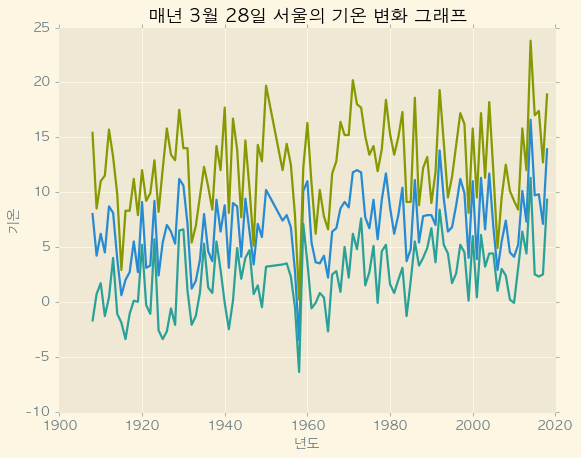

In [139]:
## 내 생일의 기온변화 그래프

# 매년 생일의 기온 정보를 담을 데이터프레임 객체
my_birthday_temp = pd.DataFrame()

for i in range(1908, 2019):
    try:
        my_birthday_temp[i] = seoul_temp.loc[str(i) + '-03-28']
    except:
        pass

# 생일의 평균, 최고, 최저기온을 선 그래프로 출력
# my_birthday_temp.T.plot()
plt.style.use('Solarize_Light2')
plt.title('매년 3월 28일 서울의 기온 변화 그래프')
plt.xlabel('년도')
plt.ylabel('기온')
plt.plot(my_birthday_temp.T.index, my_birthday_temp.T.values)
plt.show()


/var/folders/c7/9g12sj_s5pn6d36sm6m03b5w0000gn/T/ipykernel_45051/4198683095.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  august_first[i] = seoul_temp.loc[str(i) + '-08-01']
/var/folders/c7/9g12sj_s5pn6d36sm6m03b5w0000gn/T/ipykernel_45051/4198683095.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  august_first[i] = seoul_temp.loc[str(i) + '-08-01']
/var/folders/c7/9g12sj_s5pn6d36sm6m03b5w0000gn/T/ipykernel_45051/4198683095.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

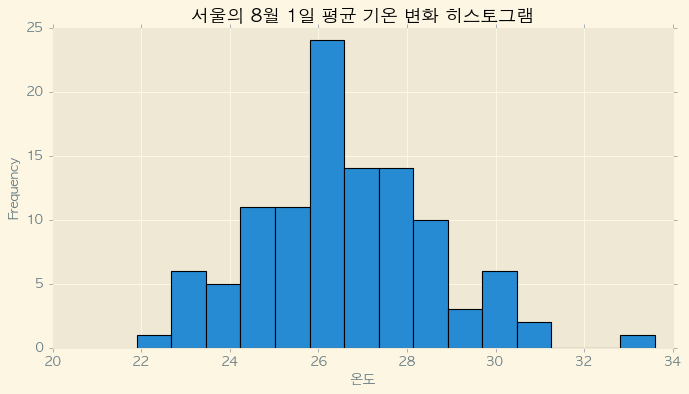

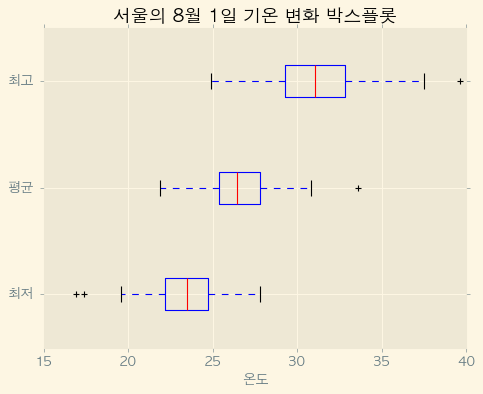

In [140]:
# 년도별 서울 8월 1일 기온에 대한 누적치 히스토그램 작성

# 매년 8월 1일의 기온 정보를 담을 데이터프레임 객체
august_first = pd.DataFrame()

for i in range(1908, 2019):
    try:
        august_first[i] = seoul_temp.loc[str(i) + '-08-01']
    except:
        pass

# 히스토그램 그리기
plt.title('서울의 8월 1일 평균 기온 변화 히스토그램')
plt.xlabel('온도')
august_first.T.Average.plot(kind='hist', bins=15, figsize=(10,5))
plt.show()

# 박스플롯 그리기
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
plt.title('서울의 8월 1일 기온 변화 박스플롯')
ax1.boxplot(x=[august_first.T.Low, august_first.T.Average, august_first.T.High], labels=['최저', '평균', '최고'], vert=False)
ax1.set_xlabel('온도')
plt.show()


/var/folders/c7/9g12sj_s5pn6d36sm6m03b5w0000gn/T/ipykernel_45051/2194314430.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  january_first[i] = seoul_temp.loc[str(i) + '-01-01']
/var/folders/c7/9g12sj_s5pn6d36sm6m03b5w0000gn/T/ipykernel_45051/2194314430.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  january_first[i] = seoul_temp.loc[str(i) + '-01-01']
/var/folders/c7/9g12sj_s5pn6d36sm6m03b5w0000gn/T/ipykernel_45051/2194314430.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling

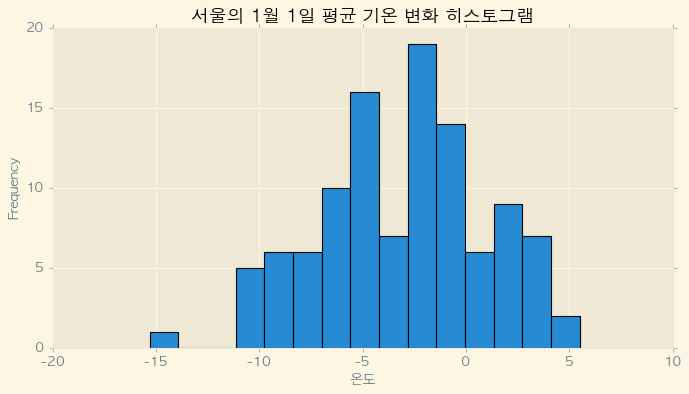

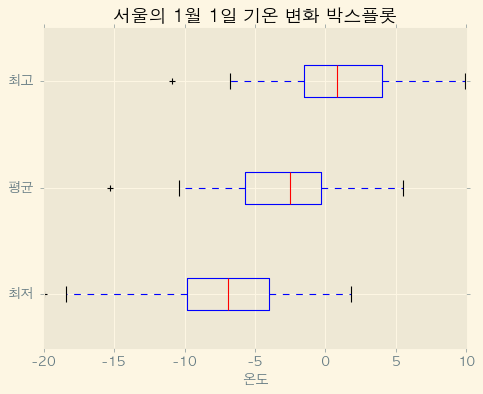

In [141]:
# 년도별 서울 1월 1일 기온에 대한 누적치 히스토그램 작성

# 매년 1월 1일의 기온 정보를 담을 데이터프레임 객체
january_first = pd.DataFrame()

for i in range(1908, 2019):
    try:
        january_first[i] = seoul_temp.loc[str(i) + '-01-01']
    except:
        pass

# 히스토그램 그리기
plt.title('서울의 1월 1일 평균 기온 변화 히스토그램')
plt.xlabel('온도')
january_first.T.Average.plot(kind='hist', bins=15, figsize=(10,5))
plt.show()

# 박스플롯 그리기
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
plt.title('서울의 1월 1일 기온 변화 박스플롯')
ax1.boxplot(x=[january_first.T.Low, january_first.T.Average, january_first.T.High], labels=['최저', '평균', '최고'], vert=False)
ax1.set_xlabel('온도')
plt.show()

1908   -3.465
1909   -2.510
1910   -2.258
1911   -4.961
1912   -4.687
        ...  
2014   -0.677
2015   -0.935
2016   -3.200
2017   -1.829
2018   -3.977
Length: 111, dtype: float64
1908    24.332
1909    25.316
1910    24.242
1911    25.019
1912    24.606
         ...  
2014    25.165
2015    26.268
2016    27.997
2017    25.916
2018    28.761
Length: 111, dtype: float64


/var/folders/c7/9g12sj_s5pn6d36sm6m03b5w0000gn/T/ipykernel_45051/3678153383.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  january_temp = pd.Series()
/var/folders/c7/9g12sj_s5pn6d36sm6m03b5w0000gn/T/ipykernel_45051/3678153383.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  august_temp = pd.Series()


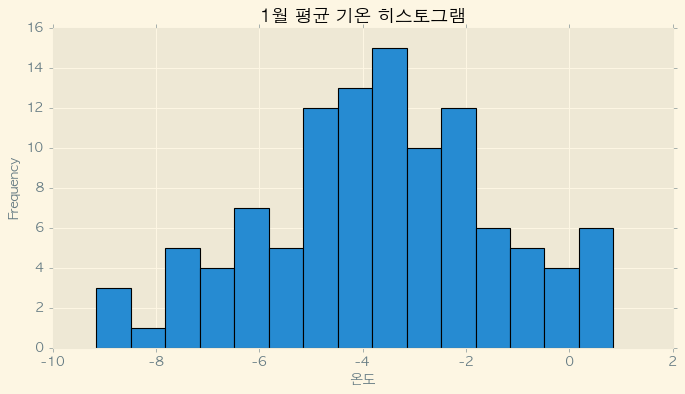

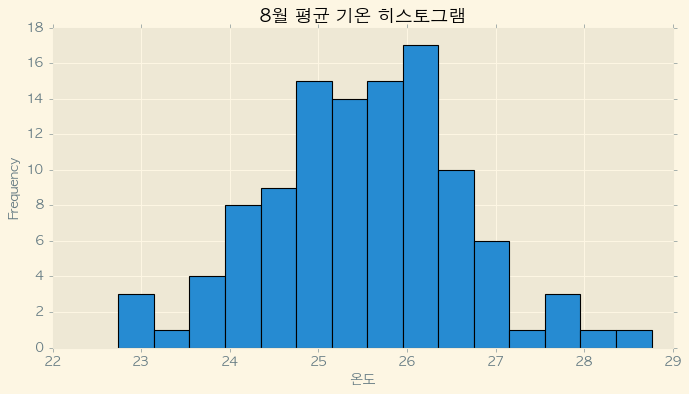

In [174]:
# 년도별 서울 1월/8월 기온에 대한 누적치 히스토그램 작성

# 1월/8월의 기온을 담을 데이터프레임 객체 생성
january_temp = pd.Series()
august_temp = pd.Series()

for i in range(1908, 2019):
    try:
        # Average 열의 기온을 mean() 메소드로 평균을 낸 후 round() 메소드로 3번째 자리까지 반올림
        january_temp.loc[i] = round(seoul_temp.loc[str(i) + '-01'].Average.mean(), 3)
    except:
        pass
    try:
        august_temp.loc[i] = round(seoul_temp.loc[str(i) + '-08'].Average.mean(), 3)
    except:
        pass

# 1월의 평균 기온 히스토그램
plt.title('1월 평균 기온 히스토그램')
plt.xlabel('온도')
january_temp.plot(kind='hist', bins=15, figsize=(10,5))
plt.show()

# 8월의 평균 기온 히스토그램
plt.title('8월 평균 기온 히스토그램')
plt.xlabel('온도')
august_temp.plot(kind='hist', bins=15, figsize=(10,5))
plt.show()


In [143]:
# 월별 기온 데이터 Boxplot 변환


In [144]:
# 8월 일별 기온 데이터 Boxplot 변환

